## Mount Google Drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set Project Directory and Change Path

In [2]:
import os

project_dir = '/content/drive/MyDrive/Skin-Cancer-Detection'
os.chdir(project_dir)

## Data Loading

In [3]:


metadata_path = "data/HAM10000_metadata.csv"
df = pd.read_csv(metadata_path)

print(f"Total images: {len(df)}")
print(f"Unique lesions: {df['lesion_id'].nunique()}")

Total images: 10015
Unique lesions: 7470


## Class Distribution Statistics

In [4]:
class_order = sorted(df['dx'].unique())

class_counts = df['dx'].value_counts().reindex(class_order)
lesion_counts = df.groupby('dx')['lesion_id'].nunique().reindex(class_order)

print("\nImages per class:\n", class_counts)
print("\nUnique lesions per class:\n", lesion_counts)


Images per class:
 dx
akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
Name: count, dtype: int64

Unique lesions per class:
 dx
akiec     228
bcc       327
bkl       727
df         73
mel       614
nv       5403
vasc       98
Name: lesion_id, dtype: int64


## Visualize Class and Lesion Distributions

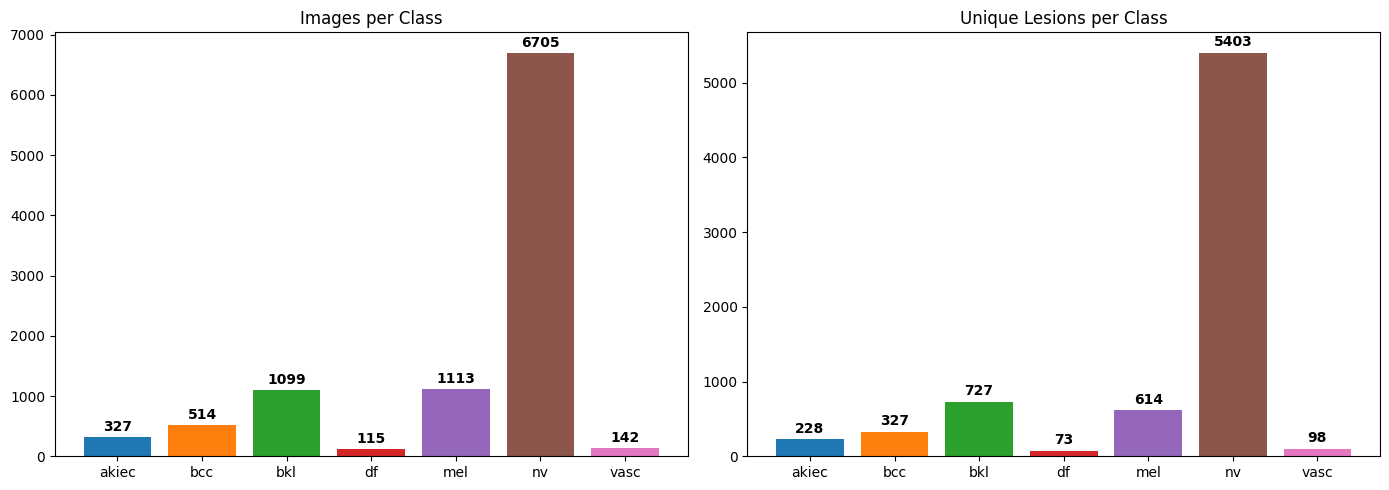

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
colors = plt.get_cmap('tab10').colors

bars0 = axes[0].bar(class_order, class_counts, color=colors)
axes[0].set_title("Images per Class")
for bar in bars0:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

bars1 = axes[1].bar(class_order, lesion_counts, color=colors)
axes[1].set_title("Unique Lesions per Class")
for bar in bars1:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()